<a href="https://colab.research.google.com/github/Pushpalatha-H/DL/blob/main/14_gd_and_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Batch Gradient Descent and Stochastic Gradient Descent

**Batch Gradient Descent** :

* Use alltraining samples for one forward pass an adjust weights.

* Good for small training set

* back propagate and adjust weights.

**Stochastic Gradient Descent**:

* Use one randomly picked samplefor a forward pass and adjust weights.

* Good when training set is very big and we dont want too much computation.

**Mini Batch Gradient Descent**:

* Mini batch gradient descent is like SGD. Instead of choosing one randomly picked training samples you will use a batch of randomly picked training samples.

* For example i have 20 training samples total.

* Lets say i use 5 random samples for one forward pass to calculate cumulative error.

* After that we have to adjust weights.


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv")

In [63]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [64]:
# do scaling since the values are in different order
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(-1,1))

In [66]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [67]:
scaled_y.ndim

2

In [68]:
# to convert this scaled_y from 2_dim to 1_dim we should reshape it
scaled_y.reshape(20, )

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

**Gradient Descent**

In [69]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):

    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b

        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

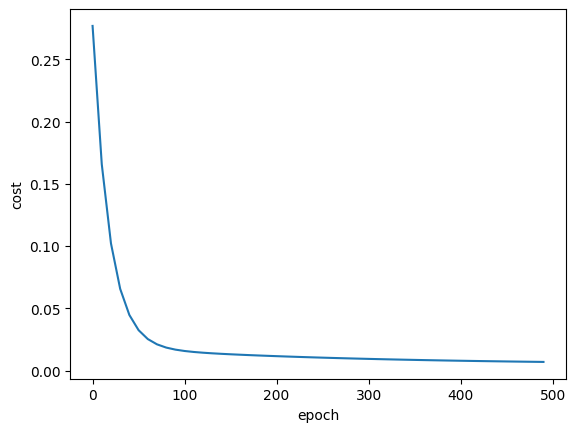

In [90]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [71]:
def predict(area, bedroom, w,b):
  scaled_x = sx.transform([[area, bedroom]])[0]
  scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]
predict(2000, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


108.70412125185153

In [73]:
import random
random.randint(0,6)

1

**Stochastic Gradient Descent**

In [83]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate=0.1):

  number_of_features = x.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = x.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sampled_x = x[random_index]
    sampled_y = y_true[random_index]

    y_predicted = np.dot(w, sampled_x.T) + b

    w_grad = -(2/total_samples)*(sampled_x.T.dot(sampled_y - y_predicted))
    b_grad = -(2/total_samples)*(sampled_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sampled_y - y_predicted)

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)


  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 100)
w_sgd, b_sgd, cost_sgd

(array([0.87753908, 0.84311633]), -0.2512462044826204, 0.010808606000839334)

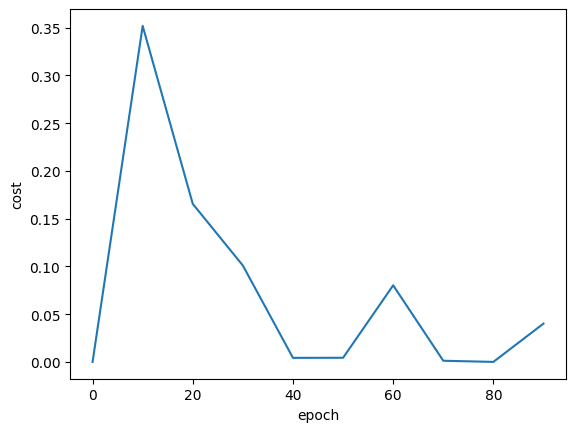

In [88]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [84]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

In [85]:
predict(2000, 4, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


132.46843890179758